In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate


In [4]:
from scipy.misc import derivative

In [ ]:
def function(x):
    return 10*np.sin(x) - np.sin(1/x) + 5*np.cos(2*x) + 1/2*np.sin(np.exp(x)) + x

In [ ]:
x = np.linspace(-7,5,10000)
X, Y = x, function(x)

In [ ]:
plt.plot(X, Y)

The following algorithm is supposed to iteratively find the minimum of a function. 

What problem does it have?

In [ ]:
import matplotlib.cm as cm
x = X
index = np.random.randint(0, len(x)) # randomly select an index to sample a point
point = x[index] # sample a point to start
derivative_in_point = derivative(function, point)
it = 0 # current iteration
max_it = 100 # set the max number of iterations to avoid infinite loops
points = [] # list of the points we have inspected
threshold = 0.01 # instead for waiting till we reach the 0 of the derivative, put a threshold
while np.abs(derivative_in_point)> 0.01 and it<max_it: 
    if derivative_in_point < 0: # if the slope is negative
        x = x[index:] # since the slope is negative, the local minimum should be on the right
        index = np.random.randint(0, len(x)) # randomly select an index
        point = x[index] # sample the next point in the new interval
        points.append(point) # store for later
        derivative_in_point = derivative(function, point) # compute the derivative in the new point
    else:
        x = x[0:index+1] # the slope is positive, so the minimum should be on the left
        index = np.random.randint(0, len(x))
        point = x[index]
        points.append(point)
        derivative_in_point = derivative(function, point)
    it +=1
plt.figure()
plt.plot(X,Y)
plt.scatter(np.array(points), function(np.array(points)), c=range(len(points)), cmap=cm.jet)
plt.title(str(it))
plt.colorbar()


## Exercise

1. Can you make the algorithm above to be implemented into a fuction `gradient_descent(function, X, max_it)`?

2. Run the experiment multiple times: do you notice any important difference at each iteration?

In [ ]:
def(function,X,max_it):
    x = X
    index = np.random.randint(0, len(x))
    point = x[index]
    derivative_in_point = derivative(function, point)
    it = 0 
    points = []
    threshold = 0.01
    while np.abs(derivative_in_point)> 0.01 and it<max_it:
         if derivative_in_point < 0:
             x = x[index:]
             index = np.random.randint(0, len(x))
             point = x[index]
             points.append(point)
             derivative_in_point = derivative(function, point)
         else:
             x = x[0:index+1]
             index = np.random.randint(0, len(x))
             point = x[index]
             points.append(point)
             derivative_in_point = derivative(function, point)
         it +=1
    plt.figure()
    plt.plot(X,Y)
    plt.scatter(np.array(points), function(np.array(points)), c=range(len(points)), cmap=cm.jet)
    plt.title(str(it))
    plt.colorbar()





## Integral

Scipy library also offers the possibility to compute the integral of a function.

In addition, the method `plt.fill_between(section, function(section)` colors the area under the curve of a generic function. 

Search the documentation of both and compute the area under the curve of the functions in the given intervals of the following exercises and plot them.



### Example

interval = \[2,5\]

Function f(x) = x


In [ ]:

a, b = [2, 5]
def f(x):
    return x

result = integrate.quad(f, a, b)
result

The return value is a tuple, with the first element holding the estimated value of the integral and the second element holding an upper bound on the error.

More in https://docs.scipy.org/doc/scipy/reference/tutorial/integrate.html .

In [ ]:
area_under_the_curve = result[0]

In [ ]:
x = np.linspace(1,10, 100)
section = np.arange(2, 5, 1/20)
plt.plot(x, f(x))
plt.fill_between(section,f(section))



1. interval = \[2,5\]

Function f(x) = 5

Compare the result computing the area by hand. Does it make sense?

Be careful: defining a constant function, you may end up with a single number instead of an array of the same size of the input. For this, I recommend to put in your function `constant_value*np.ones_like(x)`.

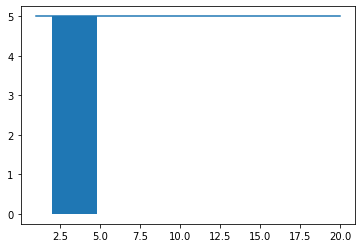

In [8]:
int_1, int_2 = [2, 5]
def f(x):
    return 5

result = integrate.quad(f, int_1, int_2)
x1 = np.linspace(1,20, 100)
section = np.arange(int_1, int_2, 0.7)

plt.plot(x1, f(x1)*np.ones_like(x1))
plt.fill_between(section,f(section)*np.ones_like(section))

2. interval = \[-1,1\]

Function f(x) = 1/x

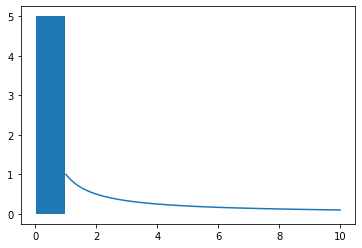

In [12]:
int_1, int_2 = [0.01, 1]
def f2(x):
    return x**-1

result = integrate.quad(f2, int_1, int_2)
x2 = np.linspace(1,10, 100)
section2 = np.arange(int_1, int_2 , 1/20)
plt.plot(x2, f2(x2))
plt.fill_between(section2,f(section2))


2. interval = \[-pi,pi\]

Function f(x) = sin(x)

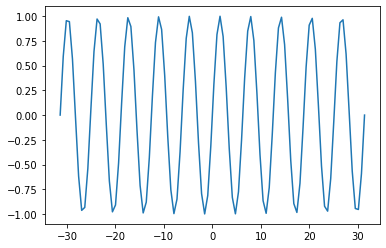

In [2]:
int_1, int_2 = [-np.pi, np.pi]
def f3(x):
    return np.sin(x)

result2 = integrate.quad(f3, int_1, int_2)
x3 = np.linspace(-10*np.pi,10*np.pi, 100)
section2 = np.arange(int_1, int_2, np.pi)
plt.plot(x3, f3(x3))
plt.fill_between(section2,f3(section2))

3. interval = \[-pi,pi\]

Function f(x) = cos(x)


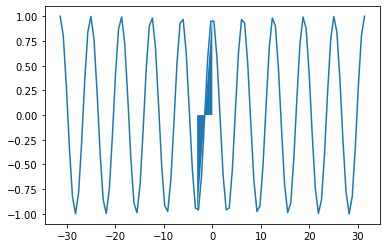

In [3]:
a2, b2 = [-np.pi, np.pi]
def f2(x2):
    return np.cos(x2)

result2 = integrate.quad(f2, a2, b2)
x2 = np.linspace(-10*np.pi,10*np.pi, 100)
section2 = np.arange(a2, b2, np.pi)
plt.plot(x2, f2(x2))
plt.fill_between(section2,f2(section2))

2. interval = \[-pi,pi\]

Function f(x) = sin(x) - cos(2x)

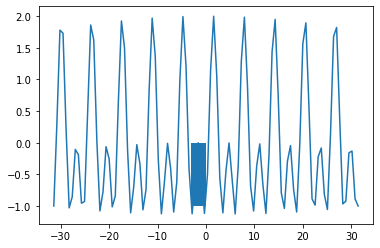

In [7]:
a2, b2 = [-np.pi, np.pi]
def f5(x):
    return np.sin(x)-np.cos(2*x)
result2 = integrate.quad(f5, a2, b2)
x2 = np.linspace(-10*np.pi,10*np.pi, 100)
section2 = np.arange(a2, b2, np.pi)
plt.plot(x2, f5(x2))
plt.fill_between(section2,f5(section2))